In [1]:
# Read NetworkX package
# https://networkx.org/documentation/stable/index.html
import networkx as nx
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm

In [2]:
df_policy_has_pa_scholarly=pd.read_pickle('./sample_dta/df_policy_has_pa_scholarly_sample.pkl.bz2')

In [4]:
# Create bipartite graph.
# https://networkx.org/documentation/stable/reference/algorithms/bipartite.html
# https://en.wikipedia.org/wiki/Bipartite_graph
g_policy_scholarly=nx.Graph() # Define graph
g_policy_scholarly.add_nodes_from(df_policy_has_pa_scholarly.policy_document_id, bipartite='policy_document_id') # Add first set of nodes and label.
g_policy_scholarly.add_nodes_from(df_policy_has_pa_scholarly.scholarly_doi, bipartite='scholarly_doi') # Add second set of nodes and label.
g_policy_scholarly.add_edges_from(df_policy_has_pa_scholarly[['policy_document_id','scholarly_doi']].values) # Add edges

In [5]:
# Project to only article network, i.e., co-occurrence/co-citation network. 
# https://en.wikipedia.org/wiki/Co-occurrence_network
# https://en.wikipedia.org/wiki/Co-citation
g_scholarly=nx.projected_graph(g_policy_scholarly, df_policy_has_pa_scholarly.scholarly_doi)

In [6]:
# The network contains too many nodes for analysis. 
len(g_scholarly)

3769

  0%|          | 0/20 [00:00<?, ?it/s]

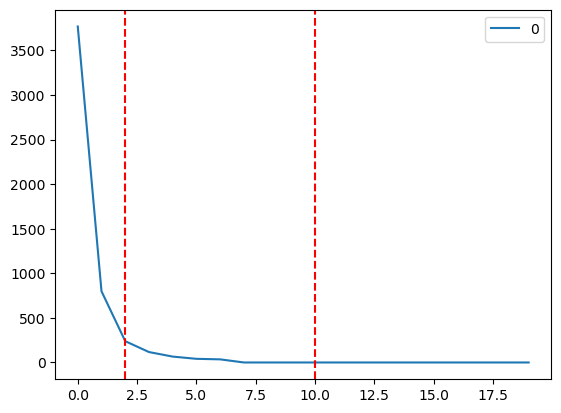

In [9]:
# Network pruning using k-core. Let's try different Ks.
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.core.k_core.html
# Another approach commonly employed is removing isolated nodes.

node_nums=[]
for k in tqdm(range(0, 20, 1)):
    g_scholarly_k=nx.k_core(g_scholarly, k=k)
    node_nums+=[len(g_scholarly_k)]

# Draw the change of network 
pd.DataFrame(node_nums).plot()
plt.axvline(x=2, color='r', linestyle='--')
plt.axvline(x=10, color='r', linestyle='--')

In [12]:
g_scholarly_k=nx.k_core(g_scholarly, k=2)

# Export to files
# Analyze in Gephi: https://gephi.org/
nx.write_graphml(g_scholarly_k, './g_scholarly_k.graphml')
nx.write_graphml(g_scholarly, './g_scholarly.graphml')